<a href="https://colab.research.google.com/github/beilak/PyBook/blob/master/Liner_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

In [74]:
pip install scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import 

In [75]:
#import numpy as np

import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [76]:
data = pd.read_csv('Real estate.csv')  # load data set
data


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [46]:
train_x = data[
    ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
    ][0:350]
train_y = data['Y house price of unit area'][0:350]

test_x = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']][350:]
test_y = data['Y house price of unit area'][350:]

In [47]:
train_x


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
345,2012.667,0.0,185.42960,0,24.97110,121.53170
346,2013.417,13.2,1712.63200,2,24.96412,121.51670
347,2013.583,17.4,6488.02100,1,24.95719,121.47353
348,2012.833,4.6,259.66070,6,24.97585,121.54516


In [48]:
train_y


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
345    37.9
346    30.8
347    11.2
348    53.7
349    47.0
Name: Y house price of unit area, Length: 350, dtype: float64

In [49]:
regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [69]:
print(regr.coef_)
print(regr.intercept_)

[ 5.40808246e+00 -2.83460787e-01 -4.16272555e-03  1.13481785e+00
  2.56173982e+02 -9.68320052e+00]
-16063.986195525624


In [51]:
#regr.predict([[2013.500, 6.5, 20.0, 10, 24.96674,	121.54067]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.53677732])

In [55]:
train_predict = regr.predict(train_x)
r2 = r2_score(train_y, train_predict)
r2

0.5798779966601115

In [58]:
test_predict = regr.predict(test_x)
r2 = r2_score(test_y, test_predict)
r2

0.5915176383769458

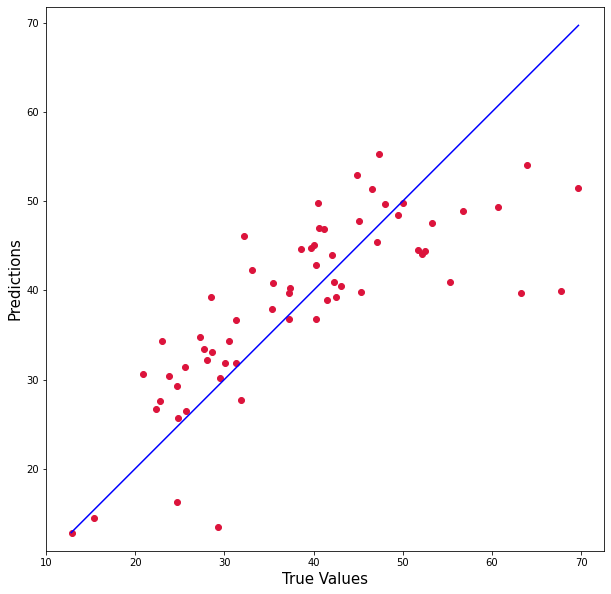

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(test_y, test_predict, c='crimson')

p1 = max(max(test_predict), max(test_y))
p2 = min(min(test_predict), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()